I predict that the Logistic regression model as the ideal model on the scaled data is going to be the best model for this project overall.  I predict the Random Forrest to be the better model on the unscaled data.  Overall the logistic regression will be the better model as it is a classifcation task and in general the logistics regression is generally used despite the complexity of other models.  Any increased accuracy provide by the more complex model will be offset with the explanability issues associated with the more complex models.  

In [1]:
#regular dependencies 
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt

# splits and scales 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models
from sklearn.datasets import make_regression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# check data to gain understanding
# train_df.head()


In [4]:
# test_df.head()


In [5]:
# check data identify value types and ensure an even set of data. 
# train_df.info()


In [6]:
# test_df.info()

In [7]:

len(train_df)/(len(train_df) + len(test_df))

0.7214784978083165

In [8]:
# print(train_df.columns)

In [9]:
train_df.loan_status.value_counts()

high_risk    6090
low_risk     6090
Name: loan_status, dtype: int64

In [10]:
print(train_df.loan_status.value_counts())
print(test_df.loan_status.value_counts())

high_risk    6090
low_risk     6090
Name: loan_status, dtype: int64
high_risk    2351
low_risk     2351
Name: loan_status, dtype: int64


In [11]:
# # change loan status columns into single column for loan status with a 0 or 1 as the result
train_df["loan_status"] = [1 if x == "high_risk" else 0 for x in train_df.loan_status]
test_df["loan_status"] = [1 if x == "high_risk" else 0 for x in test_df.loan_status]

In [12]:
test_df.loan_status.value_counts()

0    2351
1    2351
Name: loan_status, dtype: int64

In [13]:
cat_df = train_df.select_dtypes(include='object')
cat_df.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [14]:
# train_df.info()

In [15]:
#  train_df.loan_status.value_counts()

In [16]:
# test_df.loan_status.value_counts()

In [17]:
for col in cat_df.columns:
    print(cat_df[col].value_counts())
    print()

MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

n    12180
Name: pymnt_plan, dtype: int64

w    11158
f     1022
Name: initial_list_status, dtype: int64

Individual    10400
Joint App      1780
Name: application_type, dtype: int64

N    11832
Y      348
Name: hardship_flag, dtype: int64

N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [18]:
# cat_df.head()

In [19]:
cat_df2 = test_df.select_dtypes(include='object')
# the "n" is missing in the debt settlement category

for col in cat_df2.columns:
    print(cat_df2[col].value_counts())
    print()

MORTGAGE    2131
RENT        2033
OWN          533
ANY            5
Name: home_ownership, dtype: int64

Not Verified       2454
Source Verified    1715
Verified            533
Name: verification_status, dtype: int64

n    4702
Name: pymnt_plan, dtype: int64

w    4377
f     325
Name: initial_list_status, dtype: int64

Individual    4165
Joint App      537
Name: application_type, dtype: int64

N    4621
Y      81
Name: hardship_flag, dtype: int64

N    4702
Name: debt_settlement_flag, dtype: int64



In [20]:
# the Y for the debt settlement flag is missing, removal is not needed at the moment
# payment plans column can be removed as it seems that all entries have the same plan 

In [21]:
# shift to dummies for efficiecny, convert to numbers 
train_df_cat = pd.get_dummies(cat_df)
test_df_cat = pd.get_dummies(cat_df2)


In [37]:
# features converted to numerical values via dummies 
test_df_cat.head()


,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
2,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
3,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1


In [38]:
# train_df_real.info()

In [49]:
num_train_df = train_df.select_dtypes(exclude="object")
train_df_real = pd.merge(num_train_df, train_df_cat, left_index=True, right_index=True)

train_df_real.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0


In [51]:
num_test_df = test_df.select_dtypes(exclude="object")
test_df_real = pd.merge(num_test_df, test_df_cat, left_index=True, right_index=True)

test_df_real.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1


In [52]:
for col in train_df_real.columns:
    if col not in test_df_real.columns:
        print(col)
        test_df_real[col] = 0

debt_settlement_flag_Y


In [53]:
for col in train_df_real.columns:
    if col not in test_df_real.columns:
        print(col)
        test_df_real[col] = 0

In [54]:
#everyone has the same plan, pointless in using it as a feature as it wont help
cols_remove = ['Unnamed: 0', 'index', "pymnt_plan_n"]

train_df_real.drop(cols_remove, axis=1, inplace=True)
test_df_real.drop(cols_remove, axis=1, inplace=True)

In [55]:
train_df_real.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0


In [31]:
#after data clean, run models with no scaling  


# Models, without scaling and then with scaling

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [63]:
# Prepare the data
X_train = train_df_real.drop("loan_status", axis=1)
y_train = train_df_real.loan_status

X_test = test_df_real.drop("loan_status", axis=1)
y_test = test_df_real.loan_status

C:\Users\arnol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.6500821018062397
Testing Score: 0.5165886856656742

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.30      0.39      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.49      4702
weighted avg       0.52      0.52      0.49      4702


CONFUSION MATRIX:
[[1717  634]
 [1639  712]]


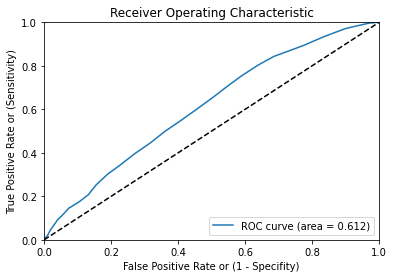

In [74]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Training Score: 0.9989326765188834
Testing Score: 0.6320714589536367

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      2351
           1       0.60      0.79      0.68      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702


CONFUSION MATRIX:
[[1114 1237]
 [ 493 1858]]


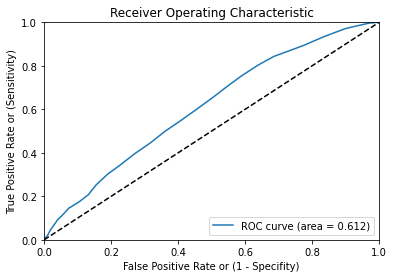

In [75]:
# Train a Random Forest Classifier model and print the model score
rf = RandomForestClassifier(random_state=42, n_estimators=25)
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

# Include the scaling now

In [66]:
# Scale the data
scaler = StandardScaler()

# Train the scaler with the training data
scaler = scaler.fit(X_train)

# Transform the dataset with the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training Score: 1.0
Testing Score: 0.5595491280306253

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      2351
           1       0.55      0.70      0.61      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.55      4702
weighted avg       0.56      0.56      0.55      4702


CONFUSION MATRIX:
[[ 981 1370]
 [ 701 1650]]


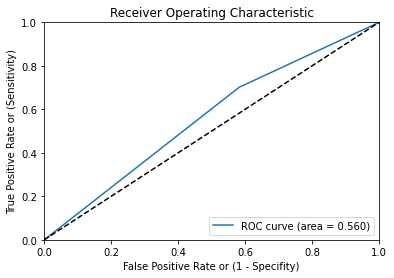

In [67]:
# logistic regression w/no scaling 

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

y_proba = dt.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Training Score: 0.9989326765188834
Testing Score: 0.6327094853253934

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      2351
           1       0.60      0.79      0.68      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702


CONFUSION MATRIX:
[[1115 1236]
 [ 491 1860]]


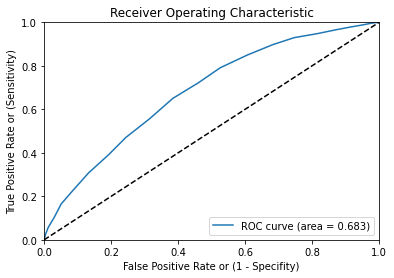

In [68]:
 from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=25)
rf = rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

C:\Users\arnol\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:20:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Score: 0.9206896551724137
Testing Score: 0.5767758400680562

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.59      0.49      0.54      2351
           1       0.57      0.66      0.61      2351

    accuracy                           0.58      4702
   macro avg       0.58      0.58      0.57      4702
weighted avg       0.58      0.58      0.57      4702


CONFUSION MATRIX:
[[1152 1199]
 [ 791 1560]]


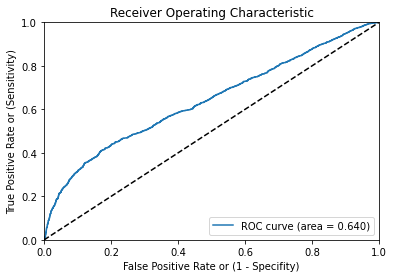

In [69]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_estimators=50)
xgb = xgb.fit(X_train_scaled, y_train)

y_pred = xgb.predict(X_test_scaled)

print(f'Training Score: {xgb.score(X_train_scaled, y_train)}')
print(f'Testing Score: {xgb.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

y_proba = xgb.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()


Training Score: 0.7636288998357964
Testing Score: 0.600382815823054

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.59      0.68      0.63      2351
           1       0.62      0.52      0.57      2351

    accuracy                           0.60      4702
   macro avg       0.60      0.60      0.60      4702
weighted avg       0.60      0.60      0.60      4702


CONFUSION MATRIX:
[[1590  761]
 [1118 1233]]


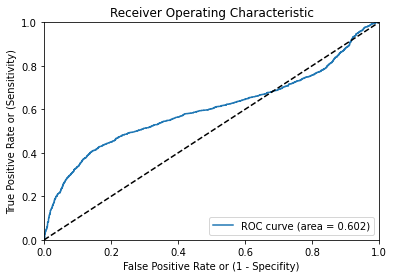

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42, n_estimators=50)
ada = ada.fit(X_train_scaled, y_train)

y_pred = ada.predict(X_test_scaled)

print(f'Training Score: {ada.score(X_train_scaled, y_train)}')
print(f'Testing Score: {ada.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

y_proba = ada.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Training Score: 1.0
Testing Score: 0.5725223309230115

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      2351
           1       0.57      0.60      0.58      2351

    accuracy                           0.57      4702
   macro avg       0.57      0.57      0.57      4702
weighted avg       0.57      0.57      0.57      4702


CONFUSION MATRIX:
[[1279 1072]
 [ 938 1413]]


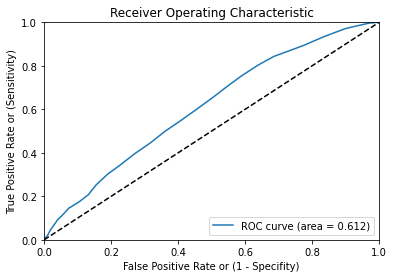

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=42, n_estimators=50)
etc = etc.fit(X_train_scaled, y_train)

y_pred = etc.predict(X_test_scaled)

print(f'Training Score: {etc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {etc.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))


y_proba = etc.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

C:\Users\arnol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.7078817733990148
Testing Score: 0.767333049766057

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2351
           1       0.77      0.76      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702


CONFUSION MATRIX:
[[1819  532]
 [ 562 1789]]


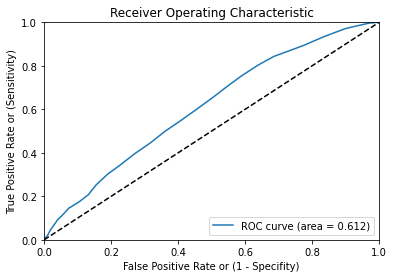

In [77]:
lr_sc = LogisticRegression()
lr_sc = lr_sc.fit(X_train_scaled, y_train)

y_pred = lr_sc.predict(X_test_scaled)

print(f'Training Score: {lr_sc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr_sc.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [ ]:
# Convert categorical data to numeric and separate target feature for training data

In [ ]:
# add missing dummy variables to testing set

In [ ]:
# **** step 1 after the data is cleaned up**** see example week 19   bag and boost  
#Train the Logistic Regression model on the unscaled data and print the model score

In [ ]:
# Train a Random Forest Classifier model and print the model score

In [ ]:
# Scale the data

In [ ]:
# Train the Logistic Regression model on the scaled data and print the model score

In [ ]:
# Train a Random Forest Classifier model on the scaled data and print the model score

In [ ]:
### analysis scaling was ineffective on tree based models.  
# the PCA needs to be done on the non-categorical data (the dummies data)

In [ ]:
#bring in the grid search feature for some added extras.  

The random forest results seem to be the same with or without the scaled data.  

The logistics regresssion appears to be the ideal model with a testing score with a result of 0.76733 with the scaled data, the logistic regression had a very low training score on the unscaled data. 

Analysis scaling was ineffective on tree based models.

Extra trees was possibly overfit and also had low testing scores.  

Random Forest results for scaled and unscaled were the same, 

